In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
ndigits = 10
p_ndigits = np.log(1 + 1/np.arange(1, ndigits))/np.log(ndigits)

def bentest(arr, ndigits=10, normalize=False):    
    ben_test = np.zeros(ndigits)
    for i in arr:
        ben_test[int(str(i).replace('0.', '').replace('-', '').replace('0', '')[0]) -1] += 1
    if normalize:
        return ben_test/np.sum(ben_test)
    return ben_test

In [26]:
loc = 2
scale = 3

arr1= np.random.randint(1, 1000, 1000) #DOES NOT FOLLOW BENFORD'S LAW

arr2 = np.random.normal(loc, scale, 1000) #DOES NOT FOLLOW BENFORD'S LAW
arr3 = np.random.uniform(loc, scale, 1000) #DOES NOT FOLLOW BENFORD'S LAW
arr4 = np.random.lognormal(loc, scale, 1000) #FOLLOWS BENFORD'S LAW
arr5 = np.random.exponential(loc, 1000) #FOLLOWS BENFORD'S LAW
arr6 = np.random.poisson(loc, 1000) #FOLLOWS BENFORD'S LAW

In [27]:
stats.ks_2samp( bentest(arr1, ndigits=10)[:-1], p_ndigits)

KstestResult(statistic=1.0, pvalue=4.11353352529823e-05)

In [21]:
def plot_wt_ben_test(arr, ndigits=10, normalize=False):
    ben_test = bentest(arr, ndigits=ndigits, normalize=normalize)
    plt.plot(ben_test, label='Dataset')
    plt.plot(p_ndigits, label='Ideal Benford Law')
    plt.legend()
    plt.xlim(1, ndigits)
    plt.show()
    return stats.ks_2samp(ben_test, p_ndigits)

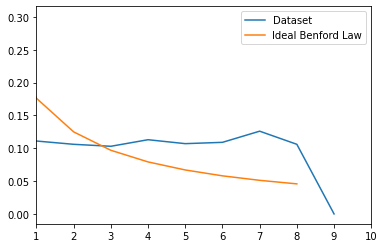

KstestResult(statistic=0.5666666666666667, pvalue=0.07462815821948943)

In [22]:
plot_wt_ben_test(arr1, ndigits=10, normalize=True)

In [28]:
arr1_prod = [arr1[i] * arr1[i+1] for i in range(len(arr1)-1)]

In [30]:
arr1_2 = np.random.randint(1, 1000, 1000) #DOES NOT FOLLOW BENFORD'S LAW

arr1_2_prod = np.multiply(arr1_2, arr1)

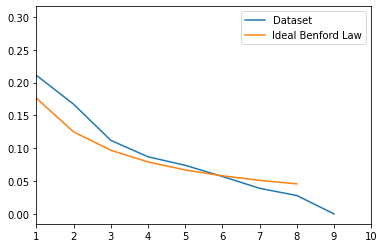

KstestResult(statistic=0.3, pvalue=0.6374786204507567)

In [31]:
plot_wt_ben_test(arr1_2_prod, ndigits=10, normalize=True)

In [32]:
# Loop it for 10 arrays

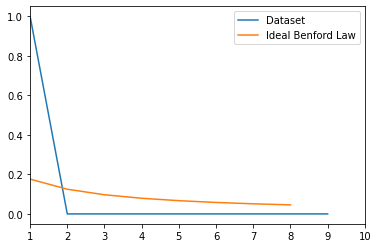

Array 1 - KstestResult(statistic=0.9, pvalue=0.0002165017644893963)


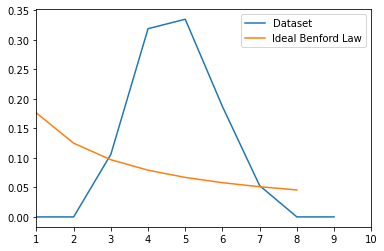

Array 2 - KstestResult(statistic=0.5, pvalue=0.1055770854532464)


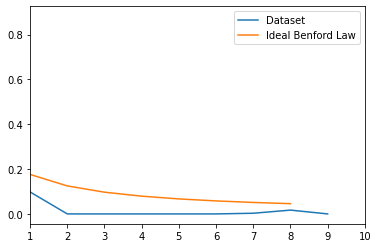

Array 3 - KstestResult(statistic=0.8, pvalue=0.00136396111628323)


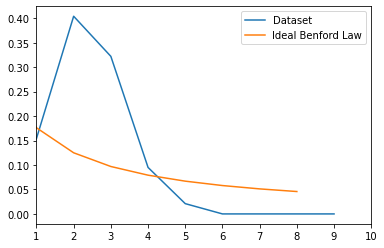

Array 4 - KstestResult(statistic=0.6, pvalue=0.03026694667561547)


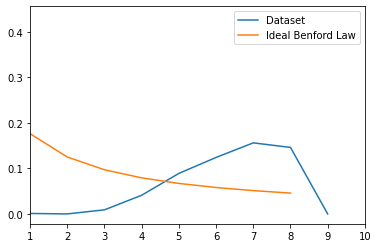

Array 5 - KstestResult(statistic=0.5, pvalue=0.1055770854532464)


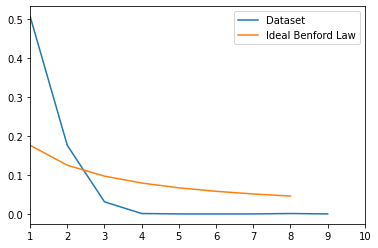

Array 6 - KstestResult(statistic=0.7, pvalue=0.007036307345905213)


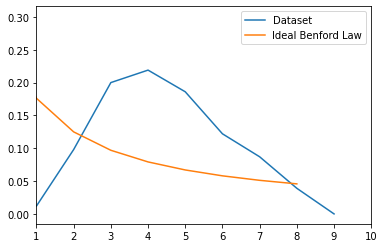

Array 7 - KstestResult(statistic=0.4, pvalue=0.2942042477646193)


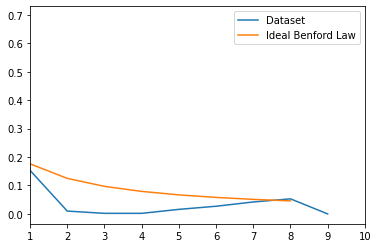

Array 8 - KstestResult(statistic=0.7, pvalue=0.007036307345905213)


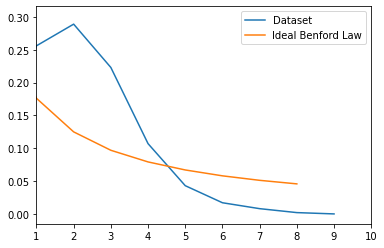

Array 9 - KstestResult(statistic=0.5, pvalue=0.1055770854532464)


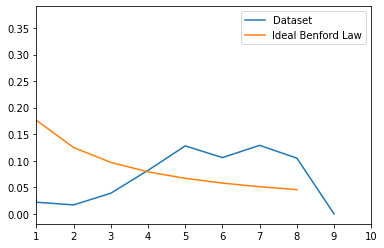

Array 10 - KstestResult(statistic=0.4, pvalue=0.2942042477646193)


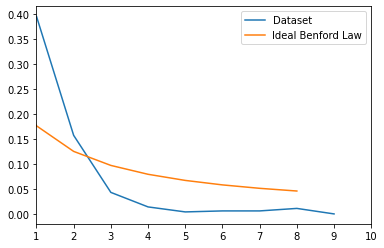

Array 11 - KstestResult(statistic=0.7, pvalue=0.007036307345905213)


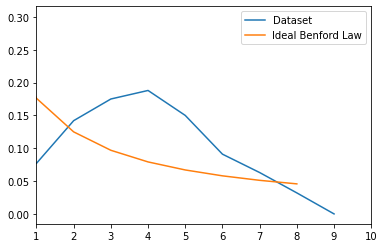

Array 12 - KstestResult(statistic=0.2, pvalue=0.9572625516897962)


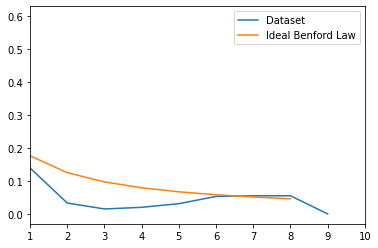

Array 13 - KstestResult(statistic=0.5777777777777777, pvalue=0.06033904176319016)


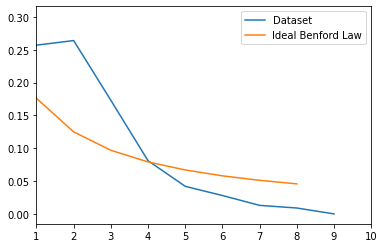

Array 14 - KstestResult(statistic=0.5, pvalue=0.1055770854532464)


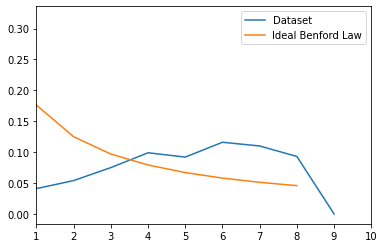

Array 15 - KstestResult(statistic=0.23333333333333334, pvalue=0.9038407413020416)


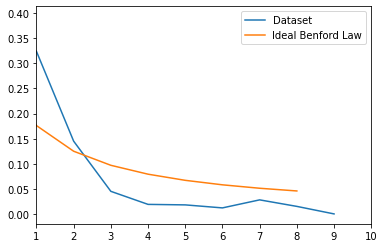

Array 16 - KstestResult(statistic=0.7, pvalue=0.007036307345905213)


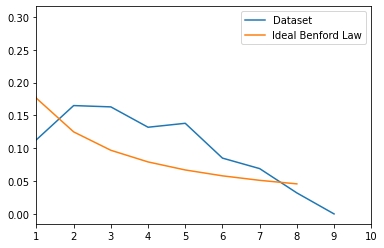

Array 17 - KstestResult(statistic=0.26666666666666666, pvalue=0.7869297884777762)


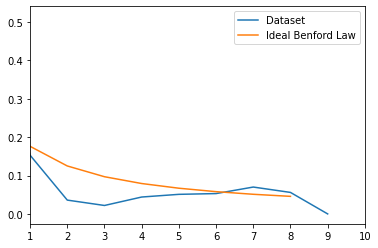

Array 18 - KstestResult(statistic=0.4777777777777778, pvalue=0.16782134274394334)


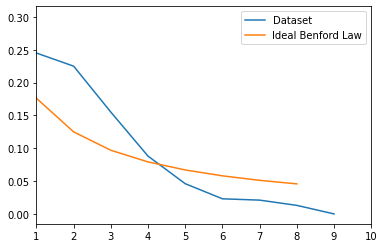

Array 19 - KstestResult(statistic=0.4, pvalue=0.2942042477646193)


In [38]:
arr_gen_prod = 1
for i in range(1, 20):
    # arr_gen = np.random.randint(1, 1000, 1000)
    # arr_gen = np.random.normal(loc, scale, 1000)
    arr_gen = np.random.uniform(loc, scale, 1000)
    arr_gen_prod = np.multiply(arr_gen, arr_gen_prod)
    print('Array {} - {}'.format(i, plot_wt_ben_test(arr_gen_prod, ndigits=10, normalize=True)))
